In [6]:
import numpy as np
import pandas as pd 
import pylab as pl
from matplotlib import pyplot as plt #画图
from sklearn.cluster import KMeans 
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import pandas_datareader as datareader
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

reading data from reading_scroll_features table and some data cleaning 

In [14]:
data = pd.read_csv('dataa/reading_scroll_features.csv')
data = data[data['relative_time'] < 2000]



(7692,)
(7692,)
(7692, 2)


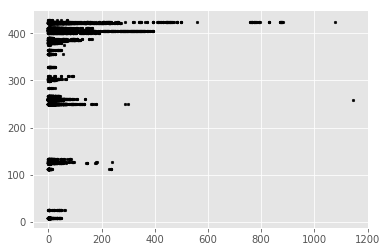

In [16]:
f1 = data['relative_time'].values
print(f1.shape)
f2= data['user_id'].values
print(f2.shape)
x = np.array(list(zip(f1,f2)))
print(x.shape)
plt.scatter(f1,f2, c='black', s=7)
#filter data 1.filtered() 2.sql 



In [17]:
# for index, row in data.iterrows():
#     if row['offset_difference'] < 0:
#         temp = row['max_offset']
#         row['max_offset'] = row['min_offset']
#        row['min_offset'] = temp
#         print(row['max_offset'],row['min_offset'],row['offset_difference'])
#         np.append([row['max_offset'],row['min_offset'],row['offset_difference']],a)
#     if row['offset_difference'] > 0:
#         np.append([row['max_offset'],row['min_offset'],row['offset_difference']],a)
#         print(row['max_offset'],row['min_offset'],row['offset_difference'])



display reading style by users

In [42]:
pd.options.display.max_rows = 1000
filtered_data =  data[(data['user_id'] == 111)]
filtered_data





,user_id,reading_session,article_id,max_offset,min_offset,offset_difference,relative_time
0,111,00c29290-338e-42e9-8897-c475c799e1e5,30118783,61,10,51,0
1,111,00c29290-338e-42e9-8897-c475c799e1e5,30118783,0,0,0,1
2,111,2684b548-a936-46f8-90d7-3941bb9cd096,30345801,203,5,198,0
3,111,2684b548-a936-46f8-90d7-3941bb9cd096,30345801,336,0,-336,1
4,111,2684b548-a936-46f8-90d7-3941bb9cd096,30367210,650,46,604,0
5,111,2684b548-a936-46f8-90d7-3941bb9cd096,30367210,2674,651,2023,1
6,111,2684b548-a936-46f8-90d7-3941bb9cd096,30367210,3374,2690,684,2
7,111,2684b548-a936-46f8-90d7-3941bb9cd096,30367210,4313,3412,901,3
8,111,2684b548-a936-46f8-90d7-3941bb9cd096,30367210,4314,4314,0,4
9,111,2684b548-a936-46f8-90d7-3941bb9cd096,30367210,4214,4094,-120,5


In [21]:
filtered_data1 = filtered_data[(filtered_data['article_id'] ==30118783 )]
filtered_data2 = filtered_data[(filtered_data['article_id'] ==30345801 )]
filtered_data3 = filtered_data[(filtered_data['article_id'] ==30367210 )]
filtered_data4 = filtered_data[(filtered_data['article_id'] ==30373336 )]
filtered_data5 = filtered_data[(filtered_data['article_id'] ==30370570 )]
filtered_data6 = filtered_data[(filtered_data['article_id'] ==30371222 )]
filtered_data7 = filtered_data[(filtered_data['article_id'] ==30368103 )]
filtered_data8 = filtered_data[(filtered_data['article_id'] ==31534153 )]
filtered_data9 = filtered_data[(filtered_data['article_id'] ==31532755 )]
filtered_data10 = filtered_data[(filtered_data['article_id'] ==31554844 )]
filtered_data11 = filtered_data[(filtered_data['article_id'] ==31589202 )]
filtered_data12 = filtered_data[(filtered_data['article_id'] ==31586980 )]
filtered_data13 = filtered_data[(filtered_data['article_id'] ==31582399 )]
filtered_data14 = filtered_data[(filtered_data['article_id'] ==31585149 )]
filtered_data15 = filtered_data[(filtered_data['article_id'] ==31587621 )]
filtered_data16 = filtered_data[(filtered_data['article_id'] ==31582826 )]
filtered_data17 = filtered_data[(filtered_data['article_id'] ==31730542 )]
filtered_data18 = filtered_data[(filtered_data['article_id'] ==31831857 )]
filtered_data19 = filtered_data[(filtered_data['article_id'] ==31832392 )]
filtered_data20 = filtered_data[(filtered_data['article_id'] ==31835198 )]




# | 31956026        |
# | 32091020        |
# | 32083181        |
# | 32082660        |
# | 32157686        |
# + --------------- +

([<matplotlib.lines.Line2D at 0x120427940>,
  <matplotlib.patches.Rectangle at 0x12037d160>])

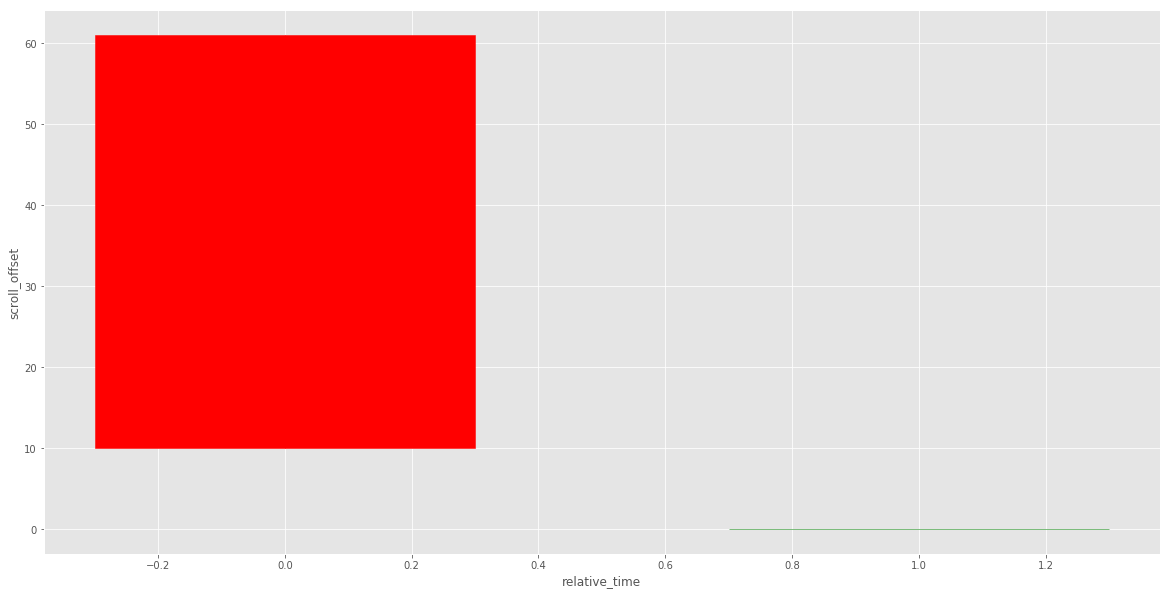

In [22]:
#for i in filtered_data: 
  #  if filtered_data['offset_difference'] > 0:
  ##      ohlc= filtered_data[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()
 #   else:
#        ohlc= filtered_data[['relative_time',  'min_offset','min_offset','max_offset', 'max_offset']].copy()
        
ohlc= filtered_data1[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')




([<matplotlib.lines.Line2D at 0x120bf8ef0>,
  <matplotlib.patches.Rectangle at 0x120c01710>])

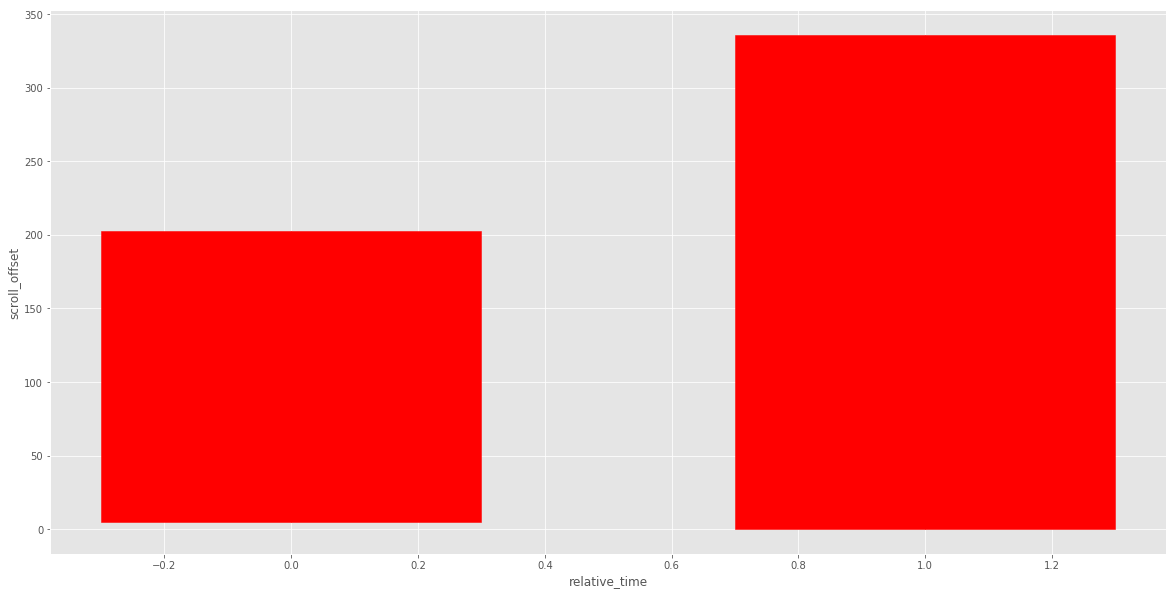

In [23]:
ohlc= filtered_data2[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a22ea29e8>,
  <matplotlib.patches.Rectangle at 0x1a22ecadd8>])

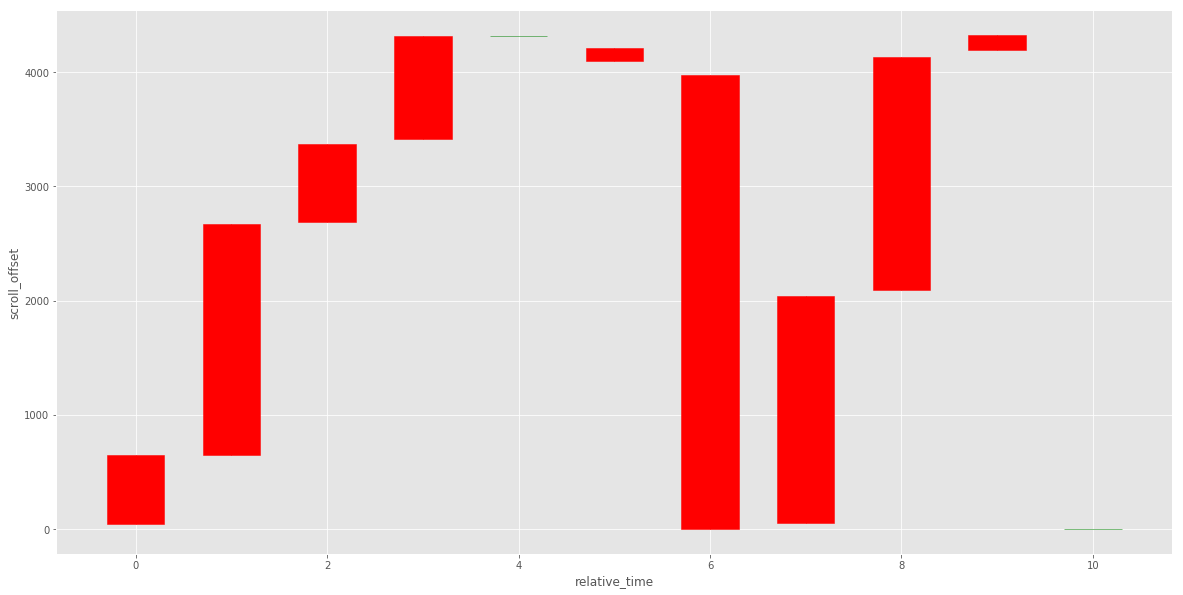

In [24]:
ohlc= filtered_data3[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a22f31710>,
  <matplotlib.patches.Rectangle at 0x1a231f4320>])

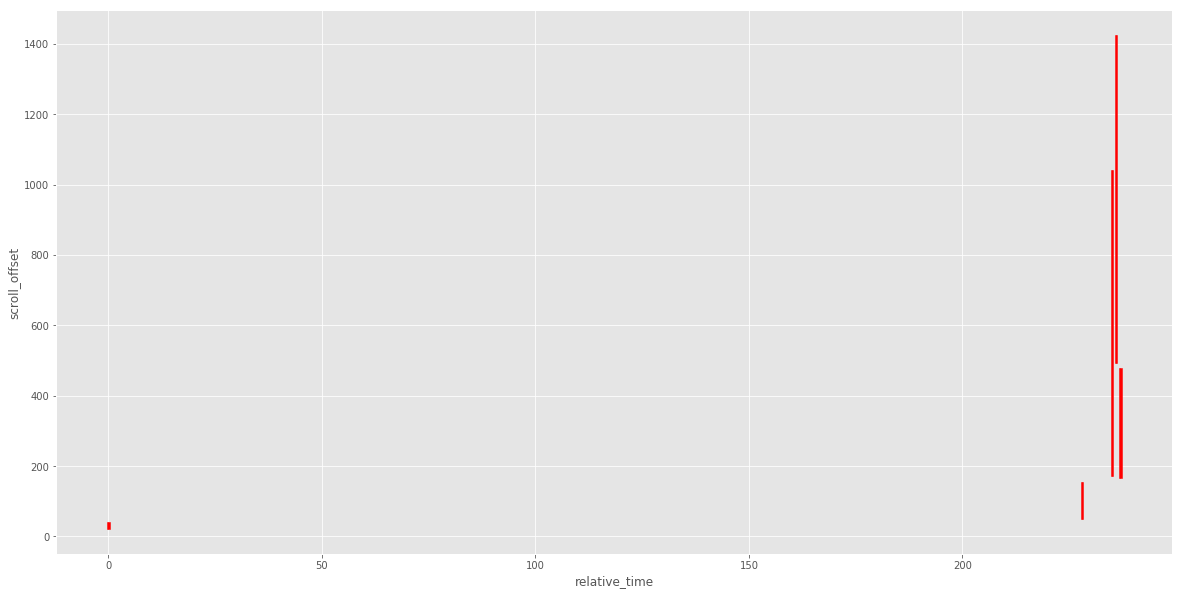

In [25]:
ohlc= filtered_data4[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a2325c5f8>,
  <matplotlib.patches.Rectangle at 0x1a232644a8>])

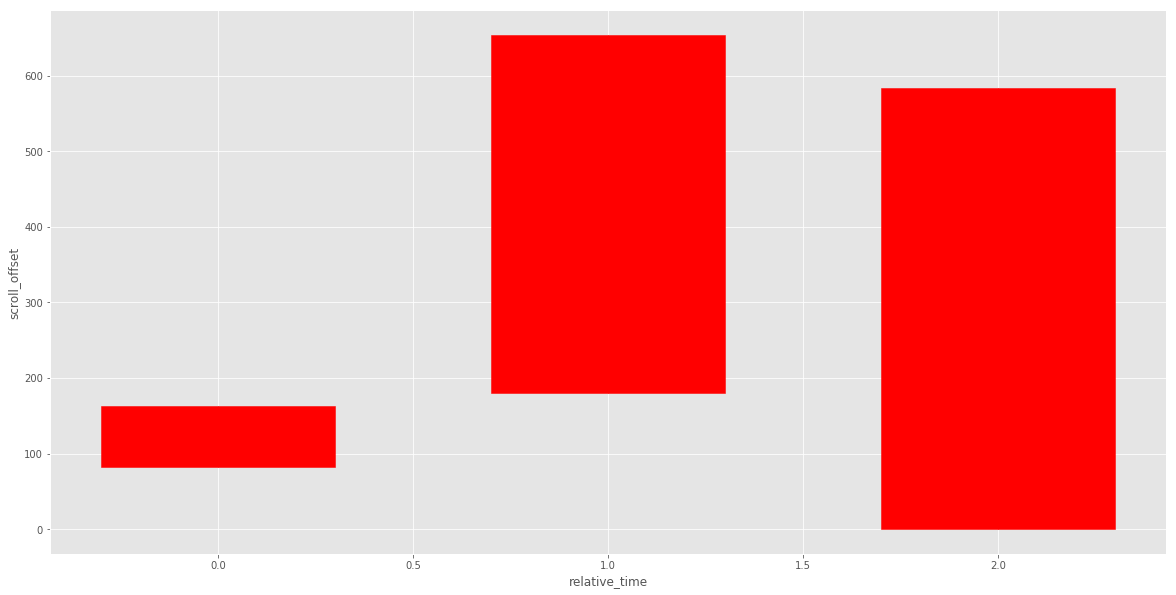

In [26]:
ohlc= filtered_data5[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a2357a128>,
  <matplotlib.patches.Rectangle at 0x1a23582668>])

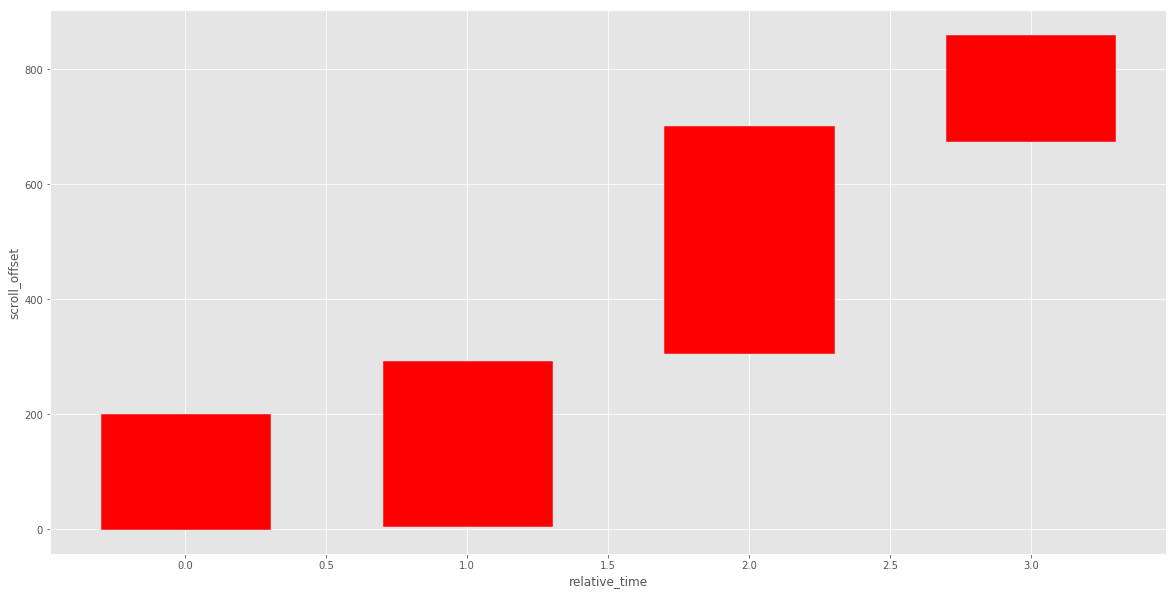

In [27]:
ohlc= filtered_data6[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a23b40358>,
  <matplotlib.patches.Rectangle at 0x1a23b40b38>])

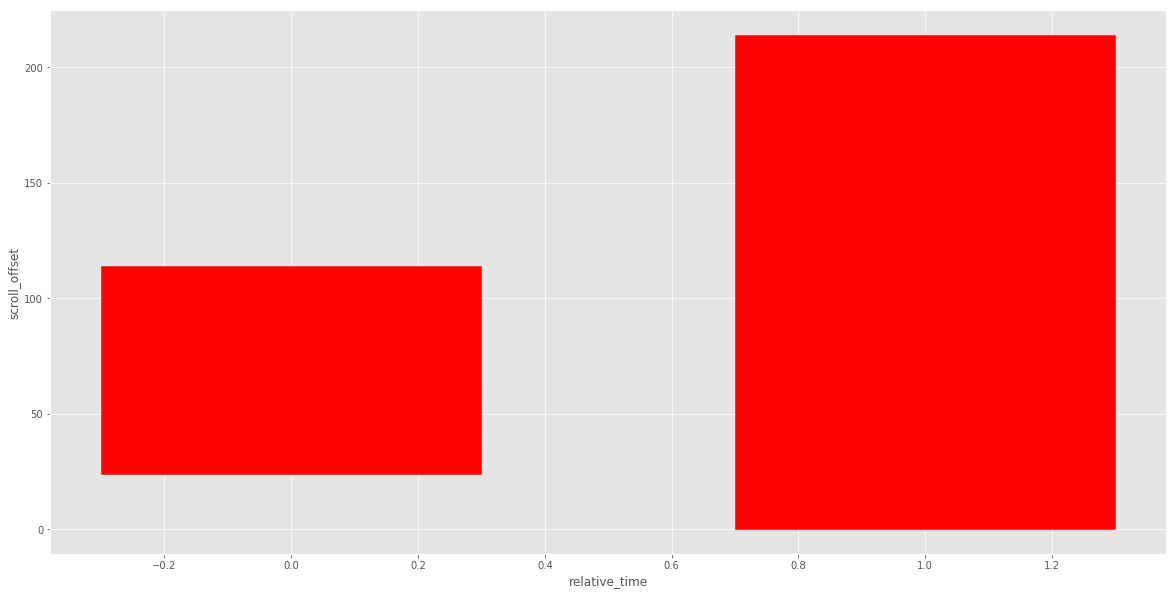

In [28]:
ohlc= filtered_data7[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a23ba6cc0>,
  <matplotlib.patches.Rectangle at 0x1a23bb04e0>])

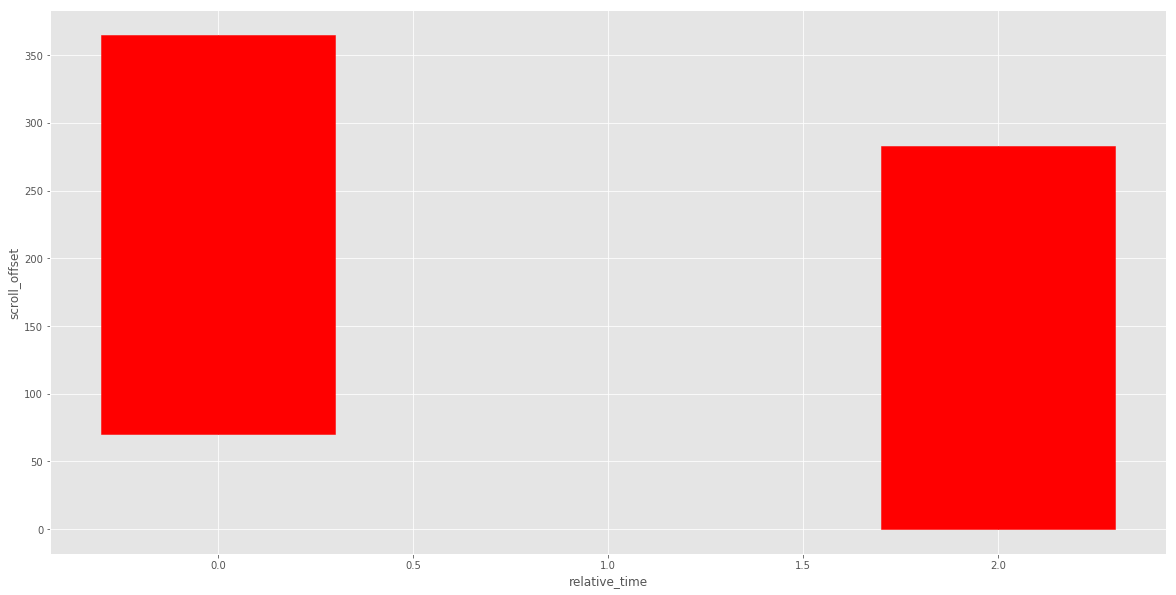

In [29]:
ohlc= filtered_data8[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a23ec26a0>,
  <matplotlib.patches.Rectangle at 0x1a23ecb550>])

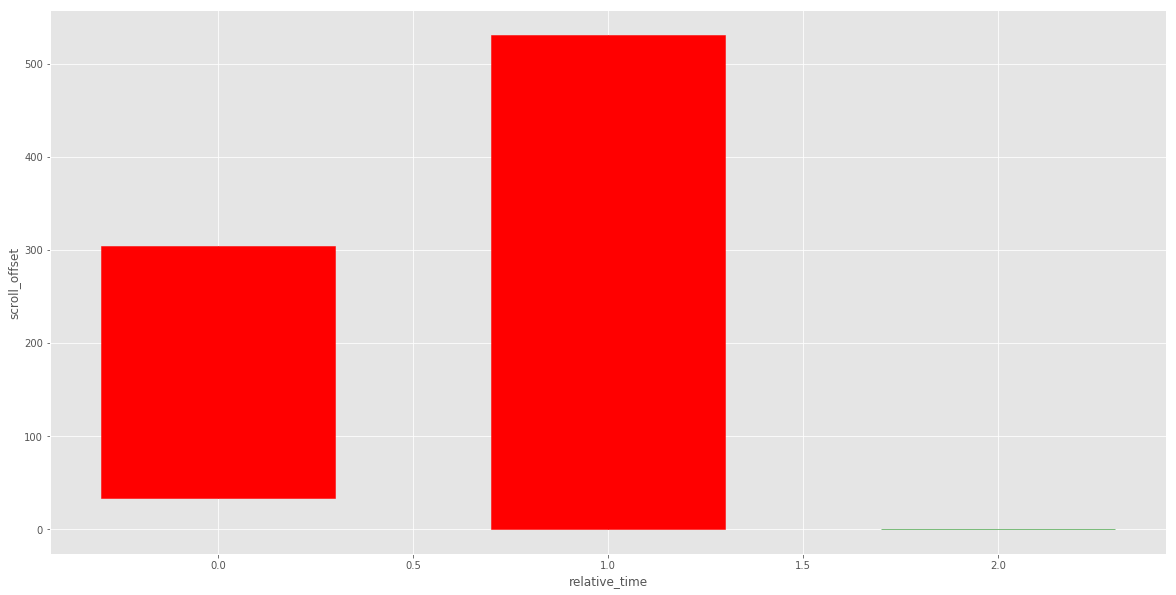

In [30]:
ohlc= filtered_data9[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a2447ebe0>,
  <matplotlib.patches.Rectangle at 0x1a2449bbe0>])

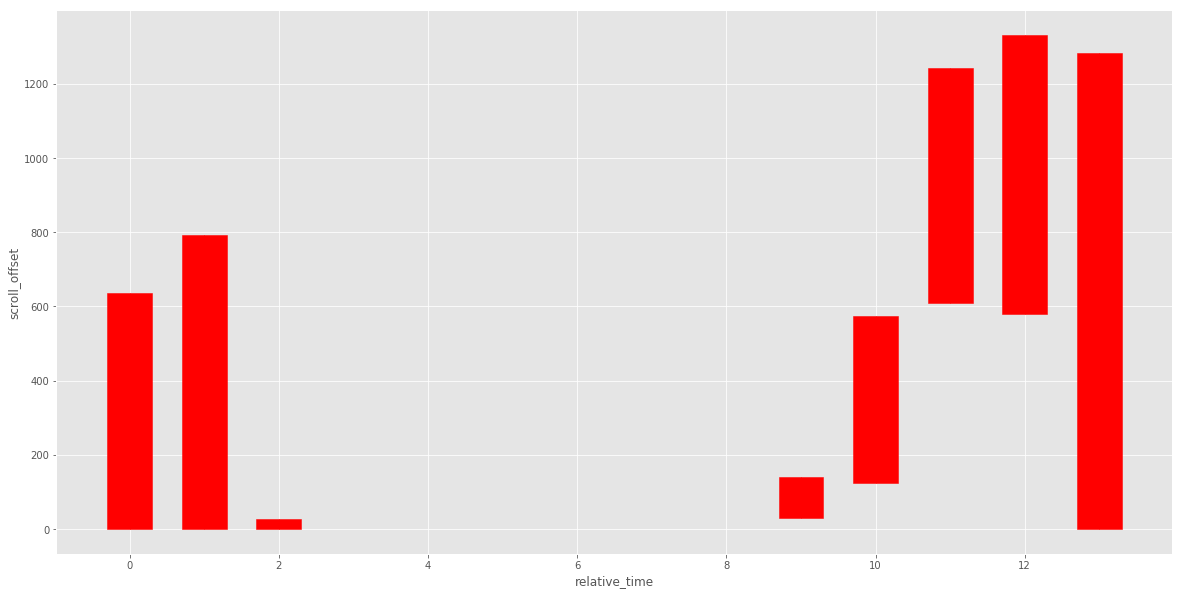

In [31]:
ohlc= filtered_data10[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a2450e4e0>,
  <matplotlib.patches.Rectangle at 0x1a24519390>])

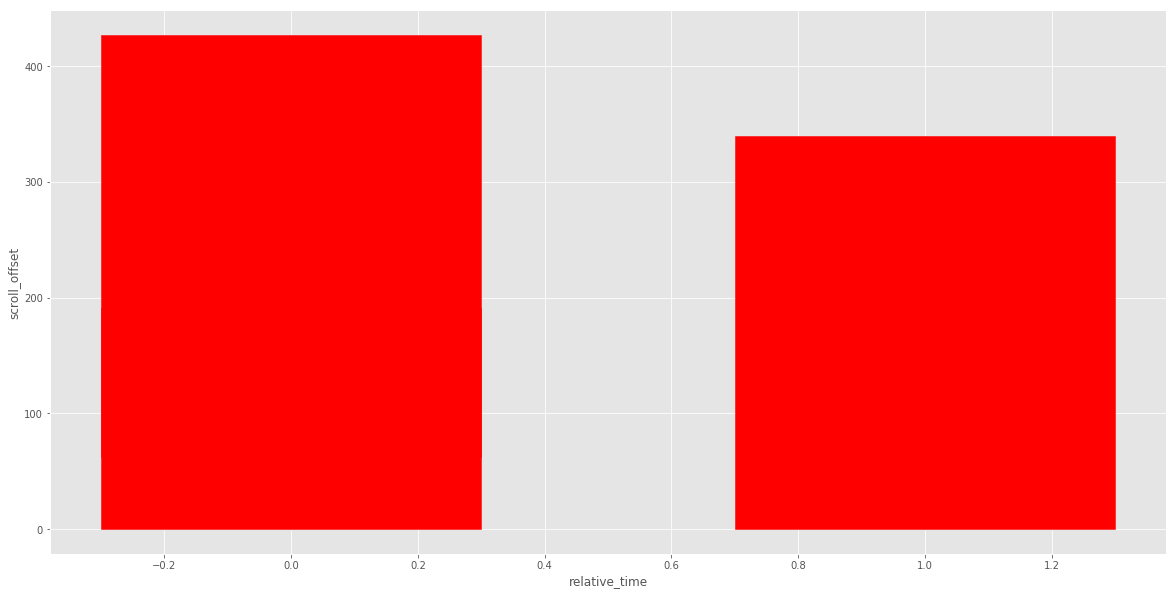

In [32]:
ohlc= filtered_data11[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')






([<matplotlib.lines.Line2D at 0x1a24ad85c0>,
  <matplotlib.patches.Rectangle at 0x1a24ae1470>])

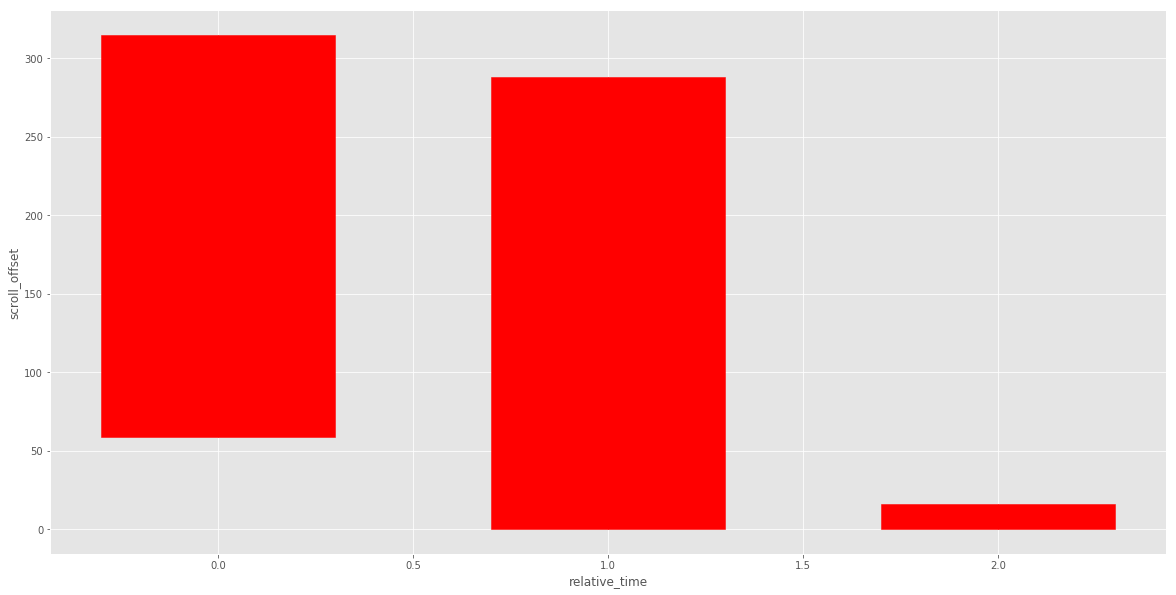

In [33]:
ohlc= filtered_data12[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([<matplotlib.lines.Line2D at 0x1a247f8da0>],
 [<matplotlib.patches.Rectangle at 0x1a24b4a160>])

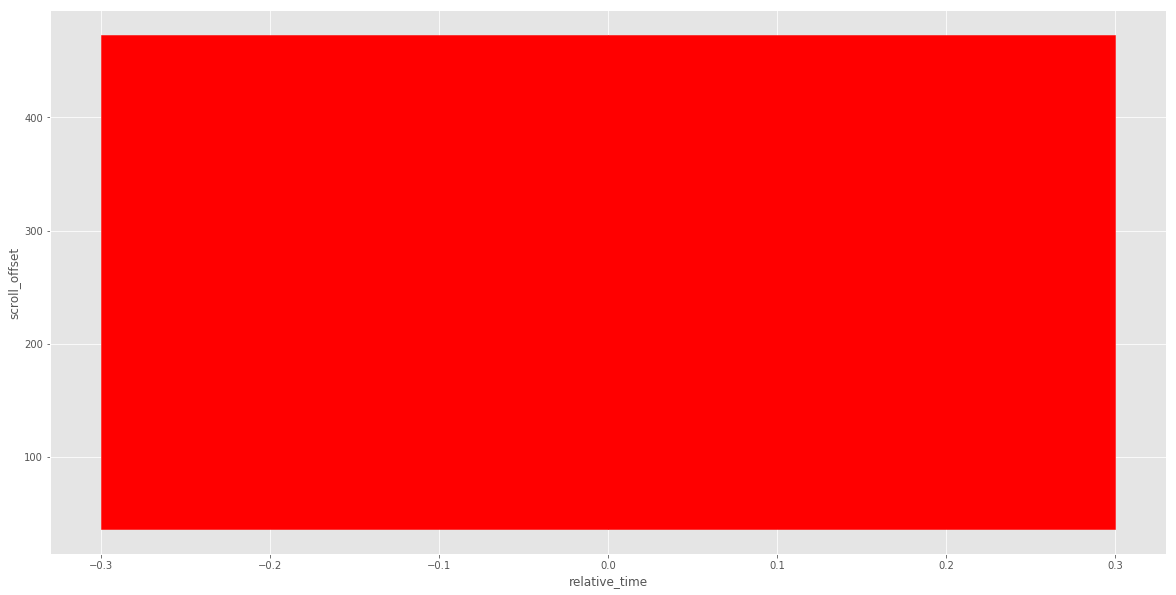

In [34]:
ohlc= filtered_data13[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([<matplotlib.lines.Line2D at 0x1a250fc908>,
  <matplotlib.patches.Rectangle at 0x1a2511c278>])

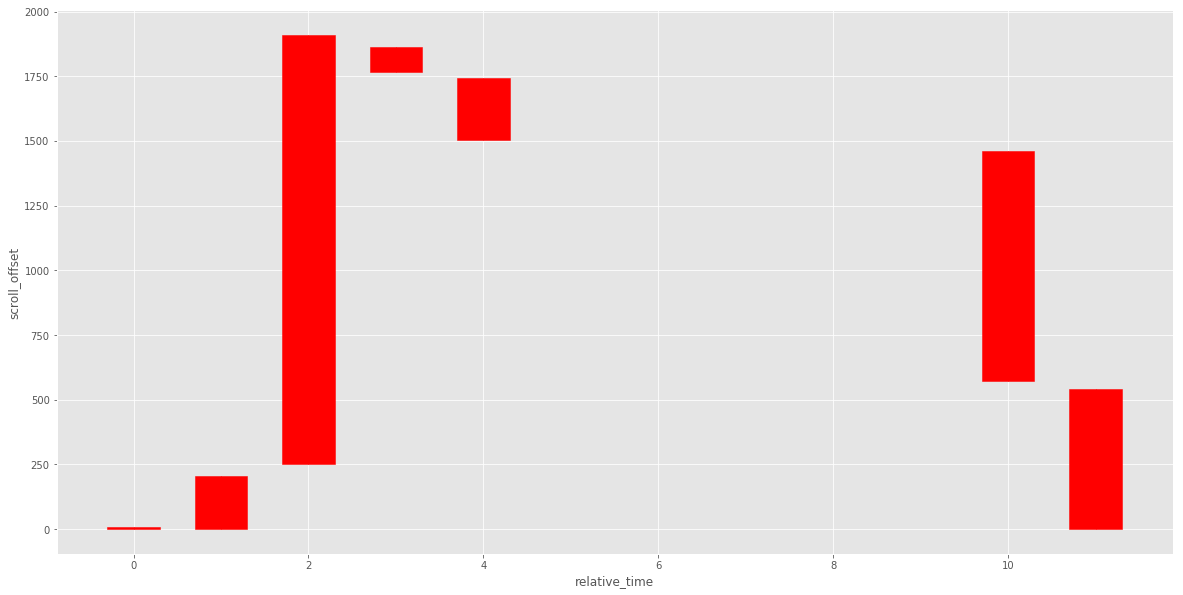

In [35]:
ohlc= filtered_data14[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([<matplotlib.lines.Line2D at 0x1a25182f60>,
  <matplotlib.patches.Rectangle at 0x1a2518ce10>])

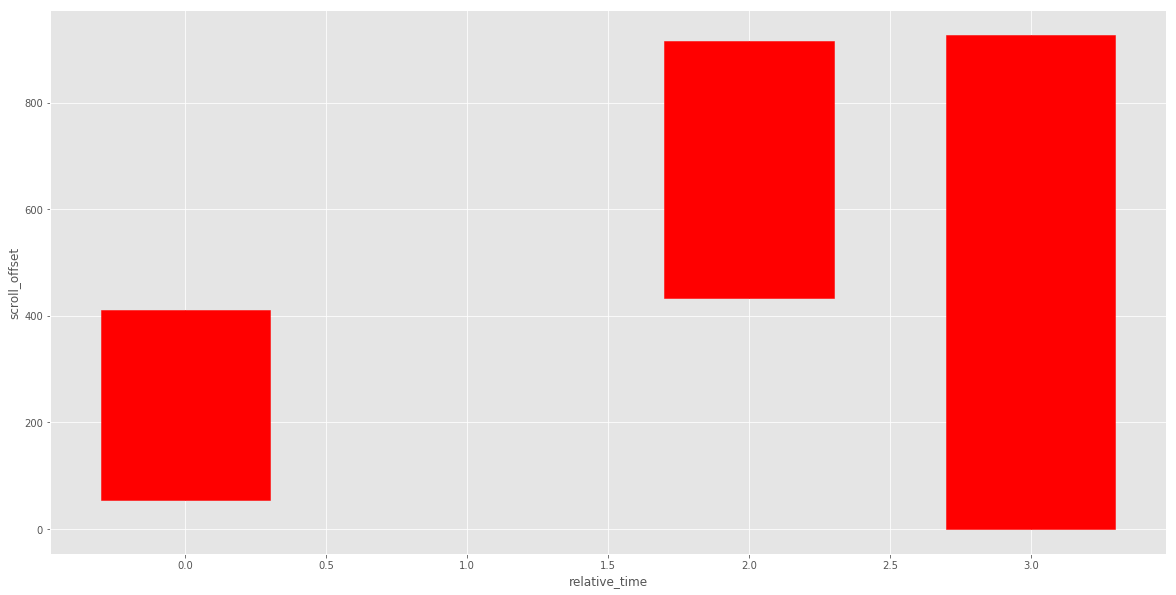

In [36]:
ohlc= filtered_data15[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([<matplotlib.lines.Line2D at 0x1a257478d0>,
  <matplotlib.patches.Rectangle at 0x1a2575eb70>])

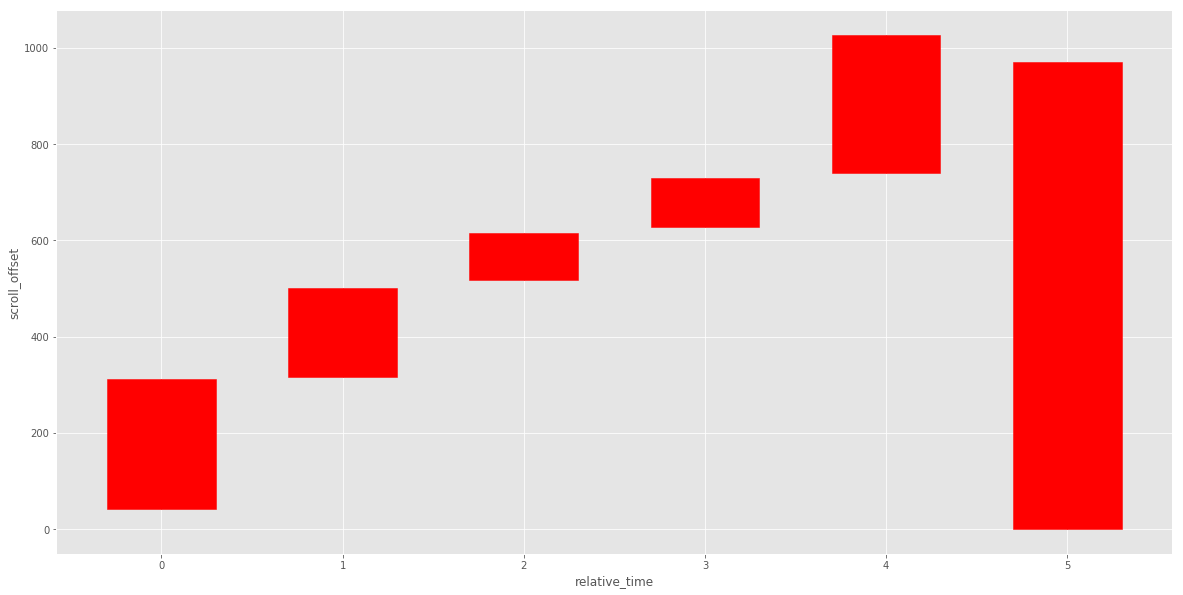

In [37]:
ohlc= filtered_data16[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([<matplotlib.lines.Line2D at 0x1a257c5a20>,
  <matplotlib.patches.Rectangle at 0x1a25a7d240>])

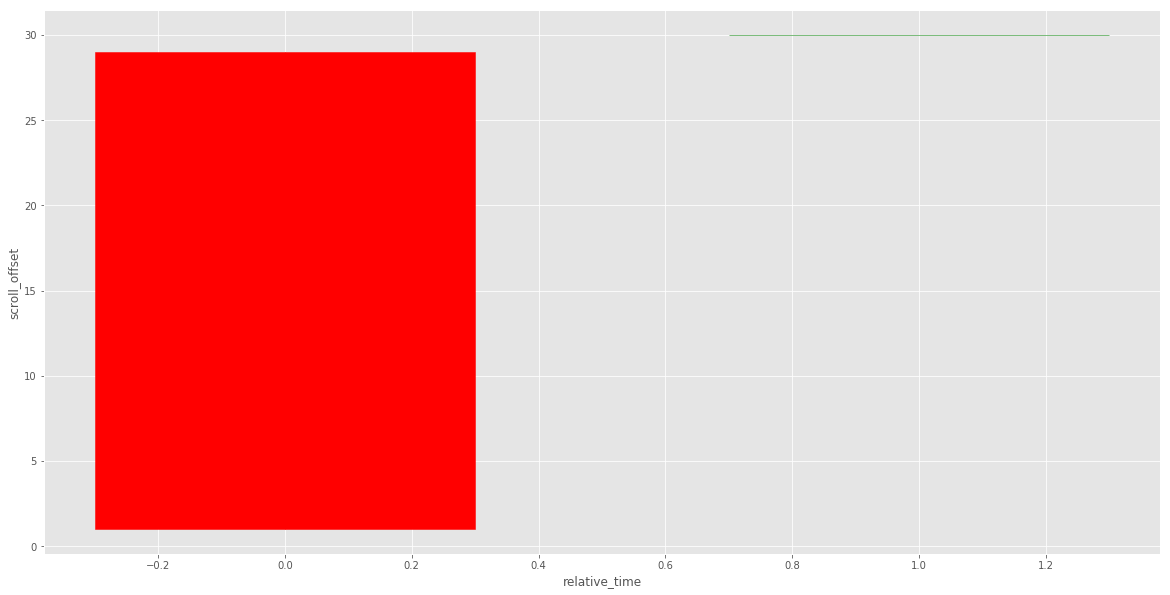

In [38]:
ohlc= filtered_data17[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([<matplotlib.lines.Line2D at 0x1a25aeb198>,
  <matplotlib.patches.Rectangle at 0x1a25af5048>])

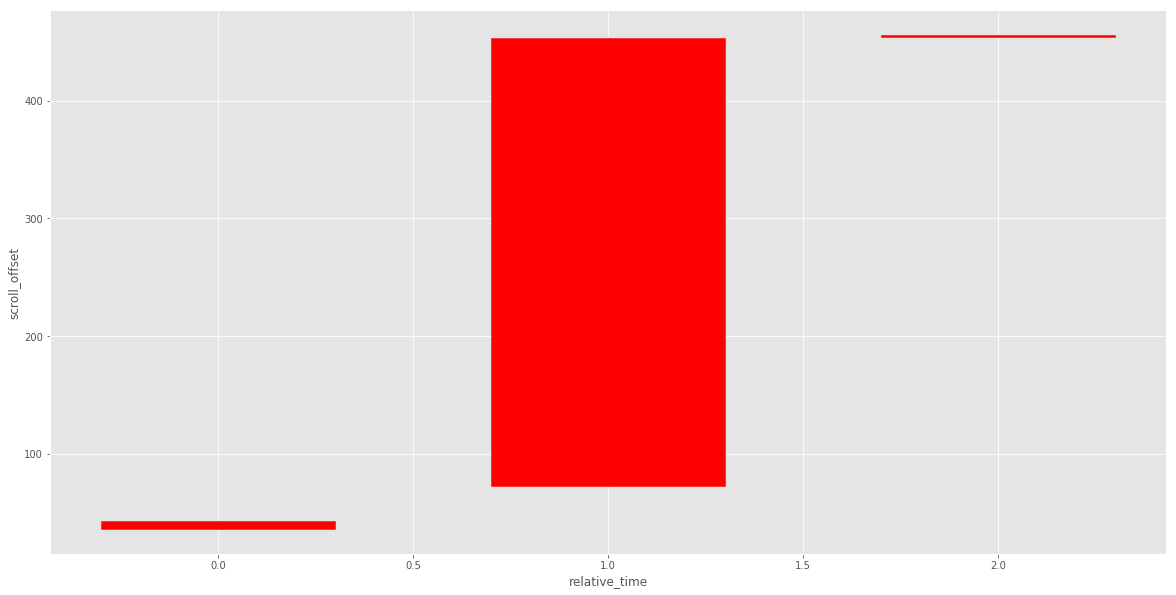

In [39]:
ohlc= filtered_data18[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([<matplotlib.lines.Line2D at 0x1a2609bdd8>,
  <matplotlib.patches.Rectangle at 0x1a260af9e8>])

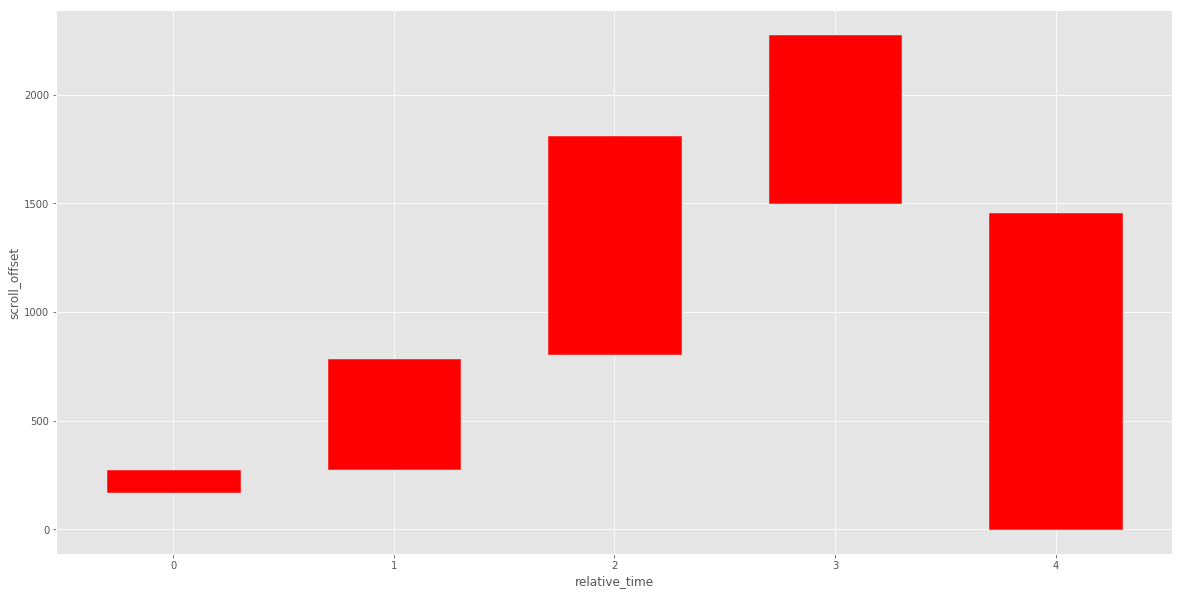

In [40]:
ohlc= filtered_data19[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([<matplotlib.lines.Line2D at 0x1a263bacc0>,
  <matplotlib.patches.Rectangle at 0x1a263c5b70>])

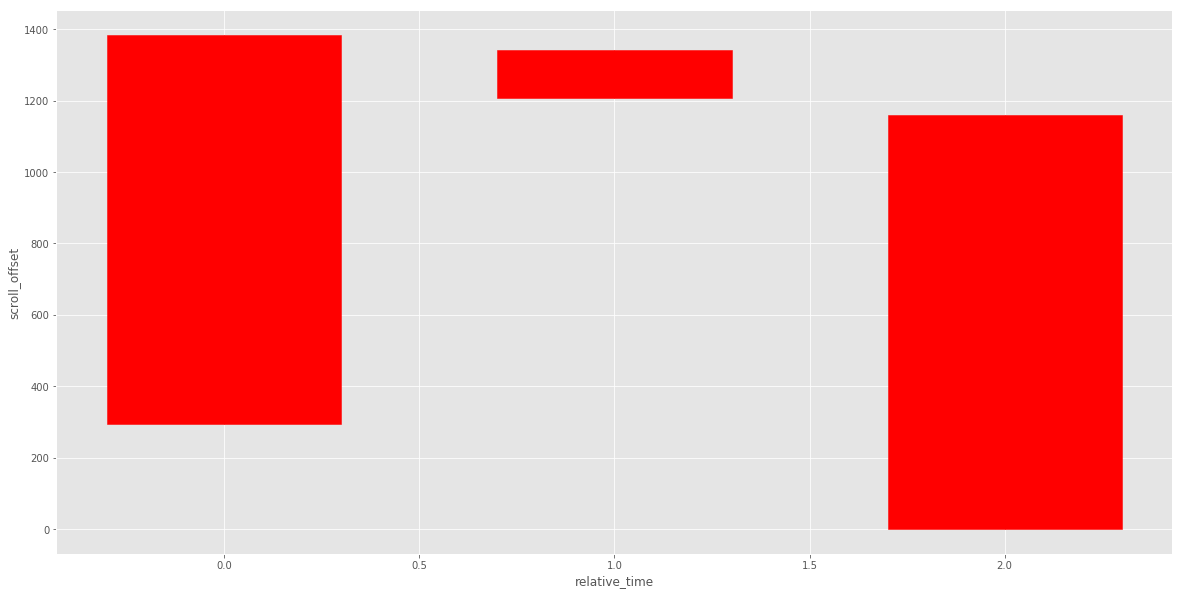

In [41]:
ohlc= filtered_data20[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





